<a href="https://colab.research.google.com/github/Davinchi211/Compiladores/blob/master/Modelos_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Algoritmos IA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
df = pd.read_csv("/content/fraudTest.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


##Preprocesamiento

In [ ]:
#cantidad de valores nulos
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
#tipos de datos de cada columna
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [ ]:
#Eliminar columnas
df.drop(columns=["Unnamed: 0", "trans_num", "street"], inplace= True)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,1371816917,44.959148,-85.884734,0


In [ ]:
#Separar 10,000 filas del dataset principal
data = df.head(n = 10000)
data.is_fraud.value_counts()

is_fraud
0    9978
1      22
Name: count, dtype: int64

In [ ]:
#Transformar variables categóricas de data (0-1)
df_processed = pd.get_dummies(data=data)
df_processed.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,dob_2001-07-10,dob_2001-07-26,dob_2001-12-19,dob_2003-05-07,dob_2003-09-14,dob_2004-03-18,dob_2004-05-08,dob_2004-06-19,dob_2004-12-30,dob_2005-01-29
0,2291163933867244,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0,...,False,False,False,False,False,False,False,False,False,False
1,3573030041201292,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0,...,False,False,False,False,False,False,False,False,False,False
2,3598215285024754,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0,...,False,False,False,False,False,False,False,False,False,False
3,3591919803438423,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0,...,False,False,False,False,False,False,False,False,False,False
4,3526826139003047,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#entrenar el modelo, separar las variables. X_train variables para entrenar. Y_train variables objetivo para predecir
x_train = df_processed.drop(columns='is_fraud', axis=1)
y_train = df_processed['is_fraud']

##Pruebas

In [ ]:
#data frame para las pruebas
df_test = pd.read_csv("/content/fraudTest.csv")
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
df_test.drop(columns=["Unnamed: 0", "trans_num", "street"], inplace= True)
df_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,1371816917,44.959148,-85.884734,0


In [ ]:
#Seleccionar 4000 filas luego de un orden aleatorio
data_test = df_test.sample(frac=1, random_state=1).reset_index()
data_test = data_test.head(n = 4000)
data_test.is_fraud.value_counts()

is_fraud
0    3986
1      14
Name: count, dtype: int64

In [ ]:
df_processed_test = pd.get_dummies(data=data_test)
df_processed_test.head()

,index,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,dob_2001-07-10,dob_2001-07-26,dob_2001-12-19,dob_2003-05-07,dob_2003-09-14,dob_2004-03-18,dob_2004-05-08,dob_2004-06-19,dob_2004-12-30,dob_2005-01-29
0,207181,4229733778084049,41.17,42701,37.6848,-85.8784,48194,1378054835,38.370429,-86.671765,...,False,False,False,False,False,False,False,False,False,False
1,501018,4223708906367574214,51.89,45051,39.0965,-84.6431,177,1387521110,39.090859,-84.115650,...,False,False,False,False,False,False,False,False,False,False
2,312515,30175986190993,2.22,56592,47.5375,-95.9941,516,1382090733,47.285136,-96.180797,...,False,False,False,False,False,False,False,False,False,False
3,407433,675909898057,87.21,10504,41.1360,-73.7009,7987,1385702190,41.503596,-73.220229,...,False,False,False,False,False,False,False,False,False,False
4,386454,30092964733035,79.78,41056,38.6207,-83.8067,14228,1384849723,39.043199,-83.842076,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
x_test = df_processed.drop(columns='is_fraud', axis=1)
y_test = df_processed['is_fraud']

#Modelo

###Regresión Logística

In [ ]:
LR = LogisticRegression(solver='liblinear')
LR.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
#Predicciones conjunto de pruebas
predictions = LR.predict(x_test)

In [ ]:
predict_proba = LR.predict_proba(x_test)

In [ ]:
LR_Accuracy_Score = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
auc_roc = roc_auc_score(y_test, predict_proba[:, 1])  # Solo si se ha calculado predict_proba anteriormente

# Imprimir las métricas
print("Exactitud:",LR_Accuracy_Score)
print("Precisión:", precision)
print("Exhaustividad:", recall)
print("Puntuación F1:", f1)
print("Matriz de Confusión:")
print(conf_matrix)
print("AUC-ROC Score:", auc_roc)

Exactitud: 1.0
Precisión: 1.0
Exhaustividad: 1.0
Puntuación F1: 1.0
Matriz de Confusión:
[[9978    0]
 [   0   22]]
AUC-ROC Score: 0.37748045700541194


###Árbol de Decisión

In [ ]:
Tree = DecisionTreeClassifier()

Tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
predictions = Tree.predict(x_test)

In [ ]:
Tree_Accuracy_Score = accuracy_score(y_test, predictions)
Tree_JaccardIndex = jaccard_score(y_test, predictions)
Tree_F1_Score = f1_score(y_test, predictions)

print(Tree_Accuracy_Score)
print(Tree_JaccardIndex)
print(Tree_F1_Score)

1.0
1.0
1.0


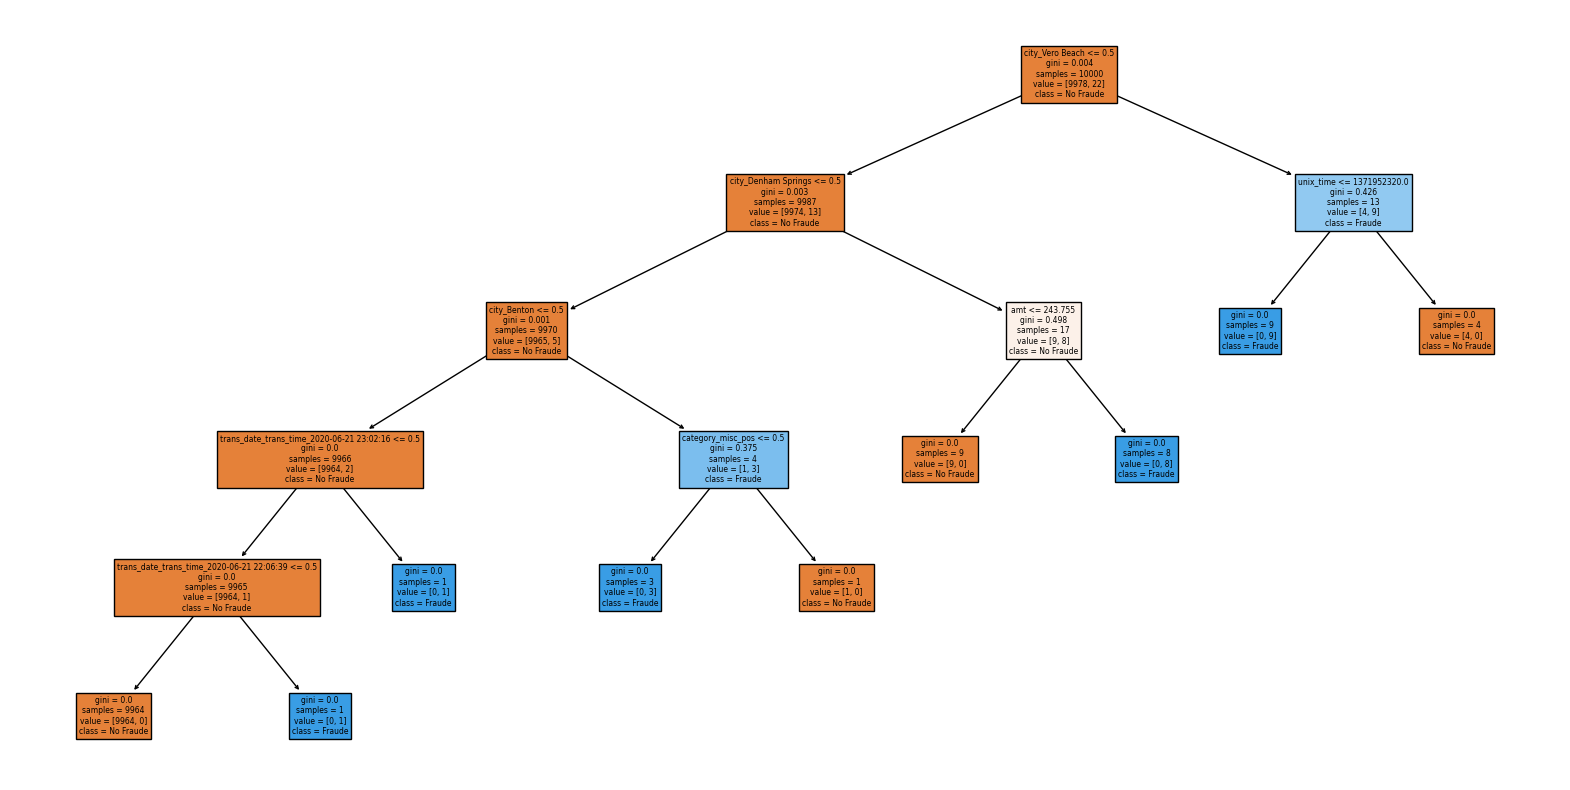

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(Tree, filled=True, feature_names=x_train.columns, class_names=['No Fraude', 'Fraude'])
plt.show()

---
#Detección de Fraude
---

In [ ]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 32.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as srn
import statistics  as sts
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
data = pd.read_csv('/content/Final Transactions.csv')
data.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0


In [ ]:
data.columns

Index(['Unnamed: 0', 'TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID',
       'TERMINAL_ID', 'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS',
       'TX_FRAUD', 'TX_FRAUD_SCENARIO'],
      dtype='object')

In [ ]:
#6000 filas del dataset original
n = len(data)
m = np.random.randint(1,n,6000)
sample = data.iloc[m,]

In [ ]:
sample = sample.iloc[:,1:]
sample.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
399225,399225,2023-02-11 13:09:35,81,3401,642.40,3589775,41,0,0
1730574,1730574,2023-06-30 12:25:51,4444,3843,1033.44,15596751,180,1,1
302059,302059,2023-02-01 11:30:23,1708,8313,398.52,2719823,31,0,0
530333,530333,2023-02-25 08:37:01,2270,754,867.90,4783021,55,0,0
598567,598567,2023-03-04 10:38:54,4582,1333,789.31,5395134,62,0,0


In [ ]:
sample.columns

Index(['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID',
       'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD',
       'TX_FRAUD_SCENARIO'],
      dtype='object')

In [ ]:
sample = sample.drop(columns = ['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID'])
sample.head()

,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
399225,642.40,3589775,41,0,0
1730574,1033.44,15596751,180,1,1
302059,398.52,2719823,31,0,0
530333,867.90,4783021,55,0,0
598567,789.31,5395134,62,0,0


###Regresion Logística

In [ ]:
#30% para pruebas 70% para entrenamiento
y = sample.TX_FRAUD
x = sample.drop(columns = ['TX_FRAUD', 'TX_FRAUD_SCENARIO'])

x_train, x_test, y_train, y_test = train_test_split(x ,y,test_size = 0.3,random_state = 0)

In [ ]:
model_log = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=400 )
model_log.fit(x_train, y_train)

y_pred = model_log.predict(x_test)
mean_absolute_error(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score:',int(acc*100),'%')

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Imprimir las métricas
print("Precisión:", precision)
print("Exhaustividad:", recall)
print("Puntuación F1:", f1)

Accuracy Score: 82 %
Precisión: 0.3724832214765101
Exhaustividad: 0.45867768595041325
Puntuación F1: 0.41111111111111115


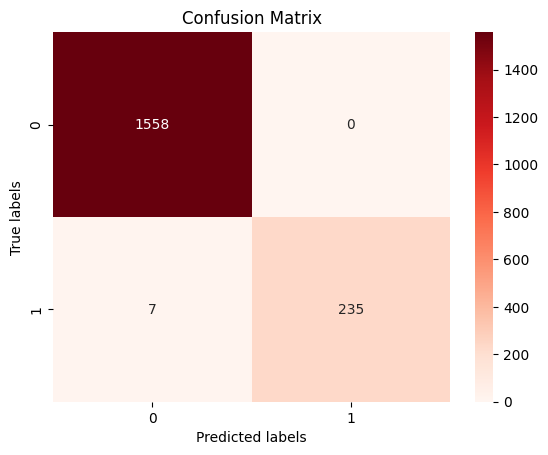

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='g', cmap = 'Reds', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

###Random Forest

In [ ]:
model_rf = RandomForestClassifier(n_estimators = 400)
model_rf.fit(x_train , y_train)

pred = model_rf.predict(x_test)
confusion = confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
print('Accuracy Score:',int(acc*100),'%')

precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
# Imprimir las métricas
print("Precisión:", precision)
print("Exhaustividad:", recall)
print("Puntuación F1:", f1)

Accuracy Score: 99 %
Precisión: 1.0
Exhaustividad: 0.9710743801652892
Puntuación F1: 0.9853249475890985


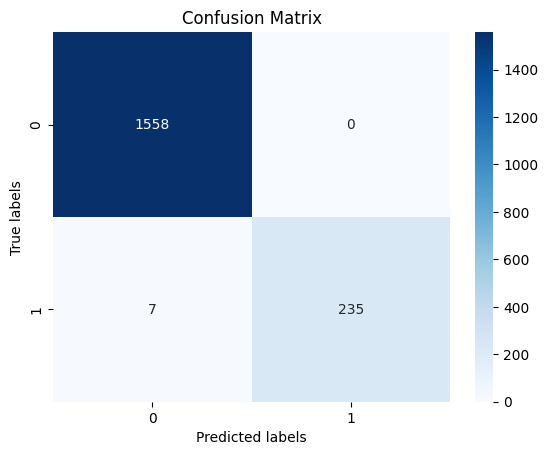

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='g', cmap = 'Blues', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

##Prueba

In [ ]:
data2 = pd.read_csv('/content/datos_prueba.csv')
data2.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,1/1/2023 0:00,596,3156,533.07,31,0,0,0
1,1,1,1/1/2023 0:02,4961,3412,808.56,130,0,0,0
2,2,2,1/1/2023 0:07,2,1365,1442.94,476,0,1,1
3,3,3,1/1/2023 0:09,4128,8737,620.65,569,0,0,0
4,896210,896210,4/4/2023 11:05,2504,8847,777.20,8075118,93,0,0


In [ ]:
data2.columns

Index(['Unnamed: 0', 'TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID',
       'TERMINAL_ID', 'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS',
       'TX_FRAUD', 'TX_FRAUD_SCENARIO'],
      dtype='object')

In [ ]:
data2_sel = data2.drop(columns=['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID'])
data2.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,1/1/2023 0:00,596,3156,533.07,31,0,0,0
1,1,1,1/1/2023 0:02,4961,3412,808.56,130,0,0,0
2,2,2,1/1/2023 0:07,2,1365,1442.94,476,0,1,1
3,3,3,1/1/2023 0:09,4128,8737,620.65,569,0,0,0
4,896210,896210,4/4/2023 11:05,2504,8847,777.20,8075118,93,0,0


In [ ]:
data2_sel.columns

Index(['Unnamed: 0', 'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS',
       'TX_FRAUD', 'TX_FRAUD_SCENARIO'],
      dtype='object')

In [ ]:
# Hacer predicciones con el modelo entrenado
data2_sel = data2[['TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS']]
pred_new = model_rf.predict(data2_sel)

print(pred_new)

y_test_new = data2['TX_FRAUD']
# Evaluar las predicciones del modelo
acc_new = accuracy_score(y_test_new, pred_new)
precision_new = precision_score(y_test_new, pred_new)
recall_new = recall_score(y_test_new, pred_new)
f1_new = f1_score(y_test_new, pred_new)
confusion_new = confusion_matrix(y_test_new, pred_new)

# Imprimir métricas de evaluación
print('Accuracy Score (New Data):', int(acc_new * 100), '%')
print('Precision (New Data):', precision_new)
print('Recall (New Data):', recall_new)
print('F1 Score (New Data):', f1_new)
print('Confusion Matrix (New Data):\n', confusion_new)

[0 0 1 0 0 0 0 0 1 1 1]
Accuracy Score (New Data): 100 %
Precision (New Data): 1.0
Recall (New Data): 1.0
F1 Score (New Data): 1.0
Confusion Matrix (New Data):
 [[7 0]
 [0 4]]
